<a href="https://colab.research.google.com/github/Sufiyanyoonus/ML/blob/main/Comprehensive_Assessment_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link


#Problem Description:

##A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
##Which variables are significant in predicting the price of a car
##How well those variables describe the price of a car
##Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

#Business Goal:

##You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
##understand the pricing dynamics of a new market.

In [2]:
# Load the data file from Drive
file_path = '/content/drive/MyDrive/CarPrice_Assignment.csv'
import pandas as pd
df = pd.read_csv(file_path)
print (df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

#EDA

In [3]:
# size of the data
print(df.shape)

# column names
print(f"\n{df.columns}")

(205, 26)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [4]:
# info about the data and data tyoes of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# statstical analysis
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# cheking the null values for better data
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [7]:
# cheking the data for any duplicates are present in the data
df.duplicated().sum()

0

In [8]:
# importing neceessasry libraries for correlation
import seaborn as sns
import matplotlib.pyplot as plt

###Dtetecting Outliers

<Figure size 1500x800 with 0 Axes>

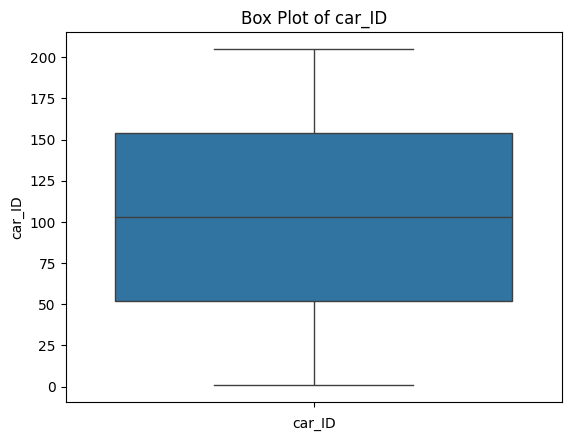

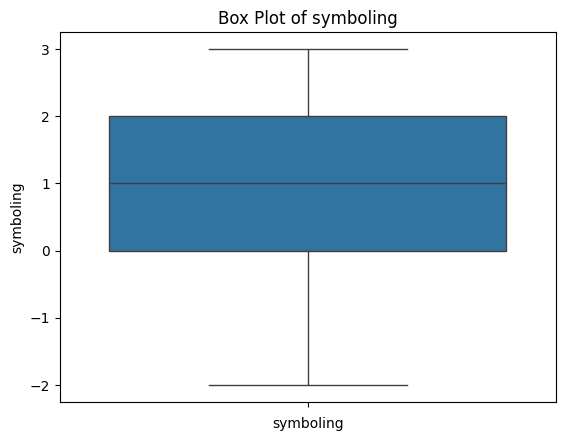

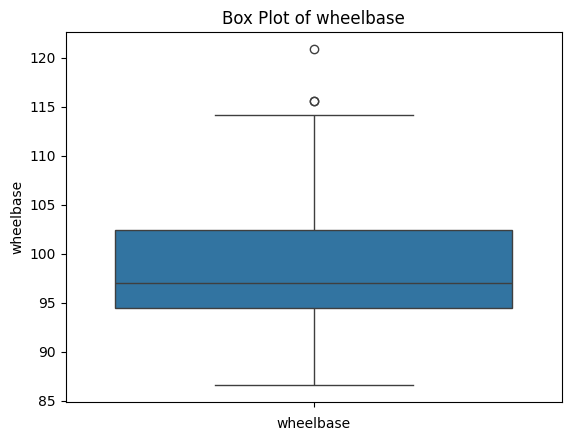

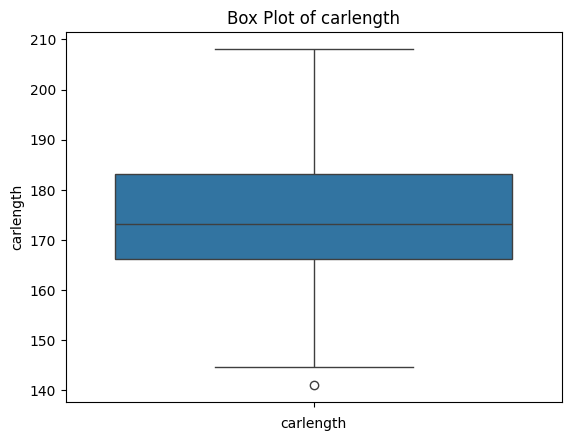

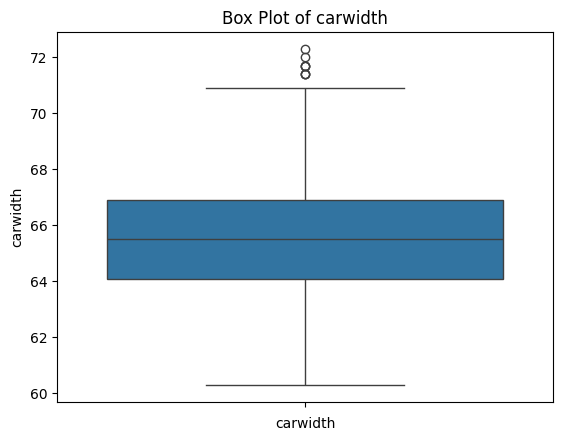

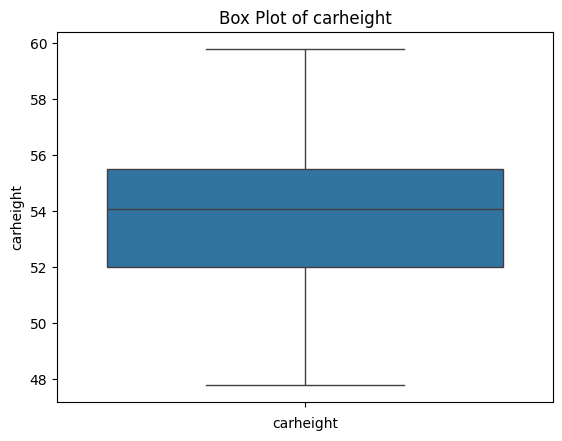

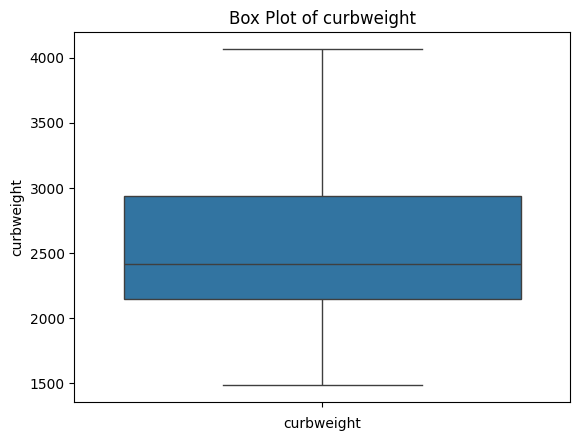

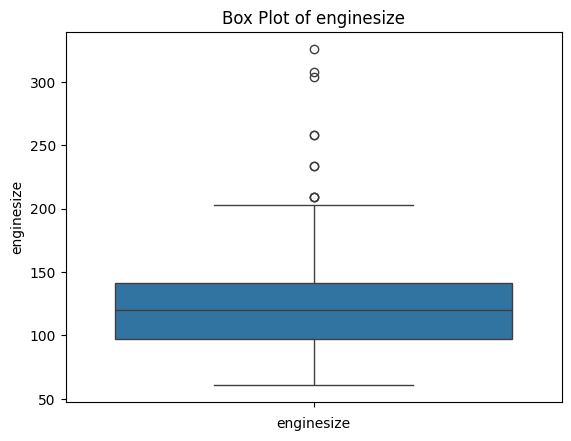

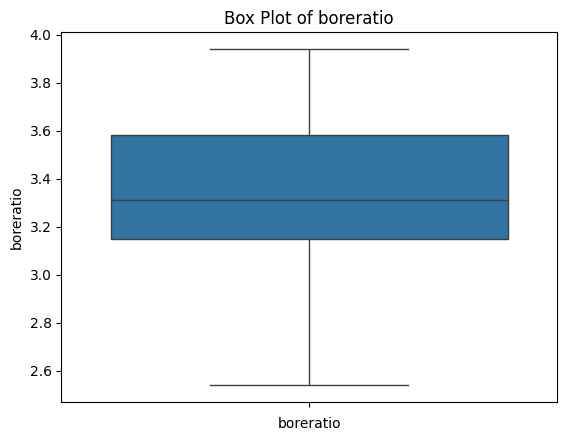

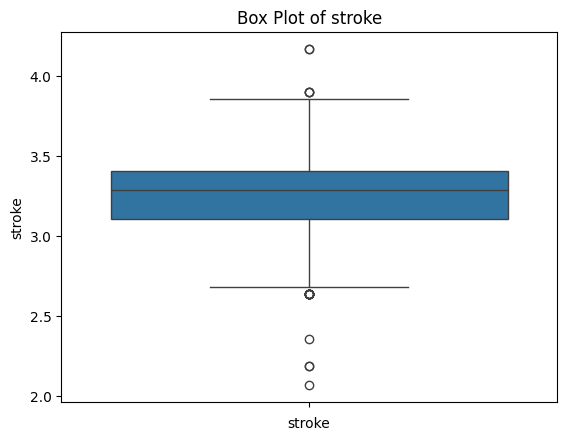

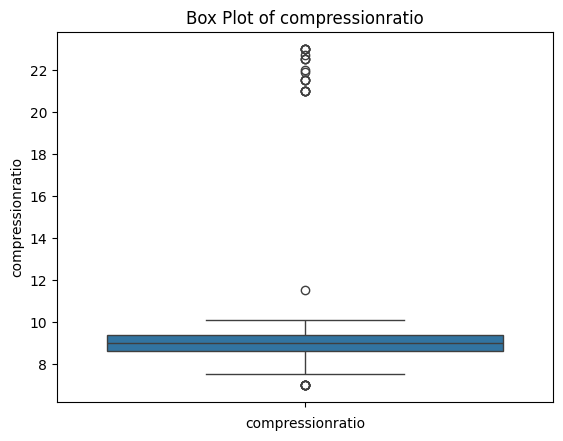

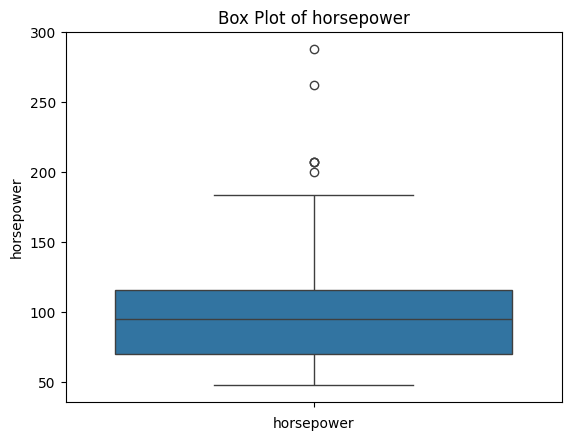

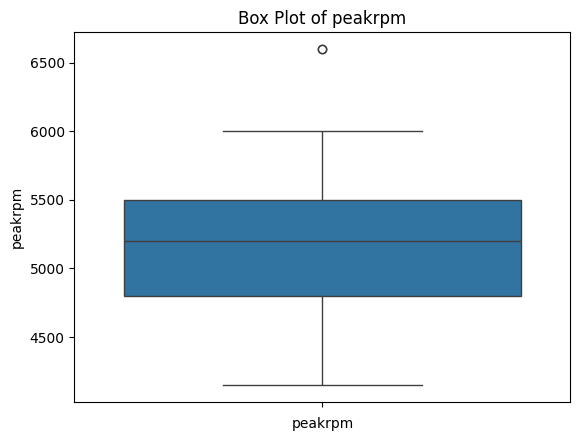

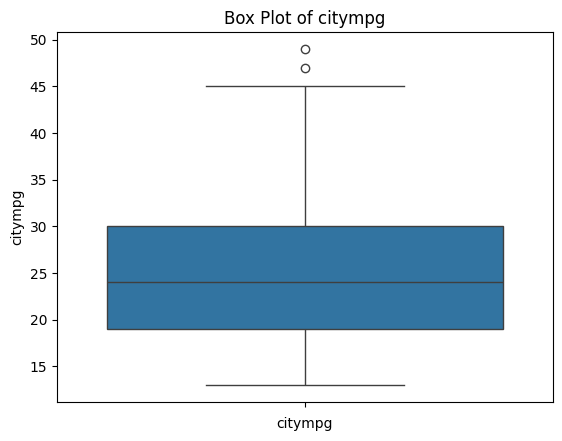

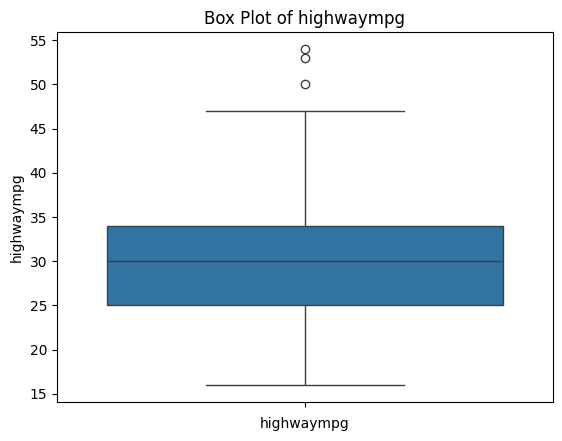

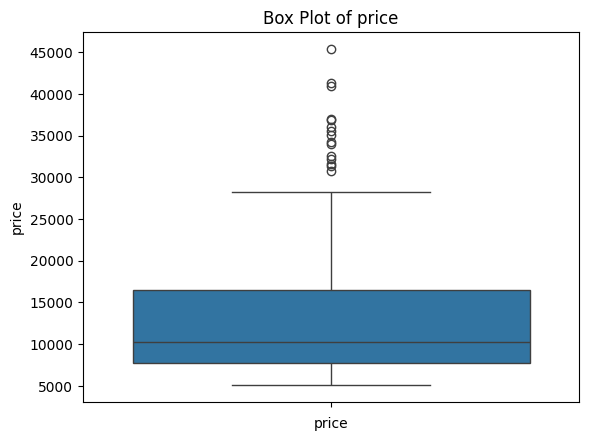

In [9]:
num_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(15, 8))  # Set figure size

for column in num_columns:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(y=df[column])  # Create a box plot for the current column
    plt.title(f'Box Plot of {column}')  # Title for the current box plot
    plt.xlabel(column)  # Label for the x-axis
    plt.show()  # Display the box plot


###Since this a caar data set it is better for not removing the outliers beacuase there are rare cares in the world which can give important insights

## Feature selection for categorical features
## for important features to select to create the model , unwanted feature influence the model badly
## we are going to use the Mutual info regrsiion for

In [10]:
# importing necessary libraries
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

In [11]:

x=df.select_dtypes(include=['object']).columns.tolist() # select data type of object to filter the categorical columns
label_encoder=LabelEncoder()
# Apply LabelEncoder to each categorical column becuas eit is easily encode the column without changing the og data set
X_encoded = df[x].apply(label_encoder.fit_transform)
y=df['price'] # target variable

In [35]:
print(X_encoded.head())

   CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        2         1           0           1        0           2   
1        3         1           0           1        0           2   
2        1         1           0           1        2           2   
3        4         1           0           0        3           1   
4        5         1           0           0        3           0   

   enginelocation  enginetype  cylindernumber  fuelsystem  
0               0           0               2           5  
1               0           0               2           5  
2               0           5               3           5  
3               0           3               2           5  
4               0           3               1           5  


In [36]:
mi_scores=mutual_info_regression(X_encoded,y) # apllying mutual regression to the features and variables

mi_scores_series=pd.Series(mi_scores,index=X_encoded.columns) # converting it to seres
print("Mutual information Scores for categorical features : \n",mi_scores_series) # printing the mutual scores for each category

Mutual information Scores for categorical features : 
 CarName           0.270560
fueltype          0.036031
aspiration        0.096986
doornumber        0.000000
carbody           0.050640
drivewheel        0.332526
enginelocation    0.003587
enginetype        0.181635
cylindernumber    0.327408
fuelsystem        0.467442
dtype: float64


In [37]:
top=5 # top 5
important_features=mi_scores_series.nlargest(top).index.tolist() # taking  the top 5 catgoricla columns with inlluence the target variable
print('The top 5 impoortant categorical features are ',important_features) # printing the top top categorical variables


The top 5 impoortant categorical features are  ['fuelsystem', 'drivewheel', 'cylindernumber', 'CarName', 'enginetype']


In [39]:
print(X_encoded[important_features].head())

   fuelsystem  drivewheel  cylindernumber  CarName  enginetype
0           5           2               2        2           0
1           5           2               2        3           0
2           5           2               3        1           5
3           5           1               2        4           3
4           5           0               1        5           3


###correlation
###Multicollinearity: Highly correlated features can cause issues in certain models like linear regression. If two variables are highly correlated, we might consider removing one.
###Feature Selection: Correlation helps us identify which features are strongly related to the target variable, aiding in feature selection.

In [15]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate correlation of numerical features with the target variable
correlation = df[numerical_columns].corrwith(df['price'])

# Display correlation values
print("Correlation of Numerical Features:\n", correlation)

# Select important features (e.g., above a certain threshold)
threshold = 0.5  # Adjust based on your needs
important_numerical_features = correlation[correlation.abs() > threshold].index.tolist()

print("Selected Important Numerical Features:", important_numerical_features)


Correlation of Numerical Features:
 car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
dtype: float64
Selected Important Numerical Features: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']


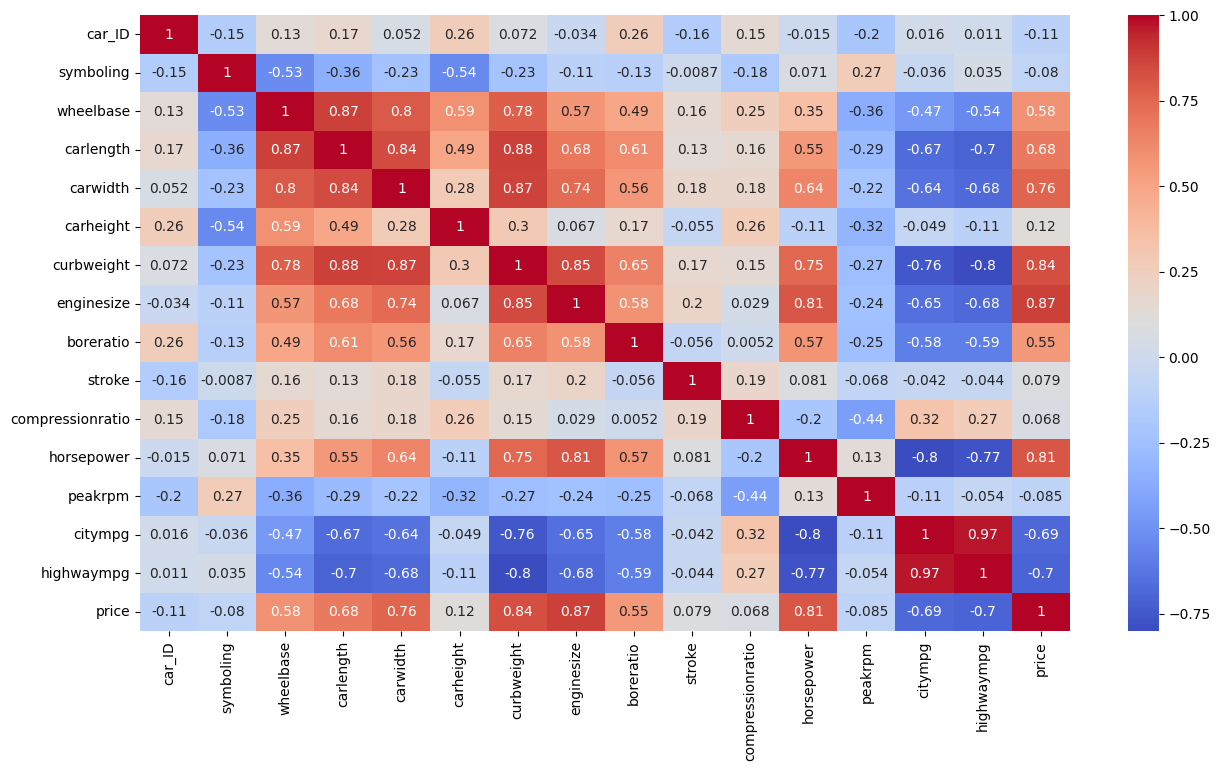

In [16]:
plt.figure(figsize=(15,8))
corr_data=df[num_columns].corr() # coor realtion
sns.heatmap(corr_data,annot=True,cmap="coolwarm") # plotting the correlatin for better visual clarity
plt.show() # showing the ploted heatmap

In [44]:
# Numerical data
numerical_data=df[important_numerical_features]

# Categorical data
categorical_data=X_encoded[important_features]

# combining both data using concaat function for modelling
data=pd.concat([numerical_data,categorical_data],axis=1)

print(data.head())



   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0       88.6      168.8      64.1        2548         130       3.47   
1       88.6      168.8      64.1        2548         130       3.47   
2       94.5      171.2      65.5        2823         152       2.68   
3       99.8      176.6      66.2        2337         109       3.19   
4       99.4      176.6      66.4        2824         136       3.19   

   horsepower  citympg  highwaympg    price  fuelsystem  drivewheel  \
0         111       21          27  13495.0           5           2   
1         111       21          27  16500.0           5           2   
2         154       19          26  16500.0           5           2   
3         102       24          30  13950.0           5           1   
4         115       18          22  17450.0           5           0   

   cylindernumber  CarName  enginetype  
0               2        2           0  
1               2        3           0  
2               3

##modelling

In [54]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [65]:

X=data.drop(['price'],axis=1) # removing the target varaible

Y=data['price'] # y=target varaible for predicting

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


models={
    'Linear Regression':LinearRegression(),
    'Decision Tree ' : DecisionTreeRegressor(),
    'Random_Forest'  : RandomForestRegressor(),
    'Gradiant Boost' : GradientBoostingRegressor(),
    'Support Vector' : SVR()
}


results =[]

for name,model in models.items(): # Evaluvating every model through a loop

  model.fit(x_train,y_train) # train model for predictions

  y_pred=model.predict(x_test) # predicting


  mse=mean_squared_error(y_test,y_pred) # mean squared error
  mae=mean_absolute_error(y_test,y_pred,) # mean absolute error
  r2=r2_score(y_test,y_pred,)  # r2_score


  results.append({
      "Model" : name ,
      "MSE"  : mse,
      "MAE"  : mae,
      "R Square" : r2
  })










In [66]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

               Model           MSE          MAE  R Square
0  Linear Regression  1.134657e+07  2323.226564  0.856271
1     Decision Tree   9.700926e+06  2072.215439  0.877116
2      Random_Forest  3.409727e+06  1288.396659  0.956808
3     Gradiant Boost  7.754027e+06  1838.609090  0.901778
4     Support Vector  8.686863e+07  5701.131574 -0.100383


In [77]:
# Assuming 'results_df' contains your model evaluation results
best_model_name = results_df.loc[results_df['R Square'].idxmax(), 'Model'] # we will get the higest R^2
best_mse = results_df['MSE'].min() # model which least in MSE
best_mae = results_df['MAE'].min() # model which least in MAE

# Display the best performing model
print(f"The best performing model is: {best_model_name}") # print
print(f"Best R Square: {results_df['R Square'].max()}")
print(f"Best MSE: {best_mse}")
print(f"Best MAE: {best_mae}")


The best performing model is: Random_Forest
Best R Square: 0.956808288798452
Best MSE: 3409727.3509231466
Best MAE: 1288.3966585365854


#Justification for the Best Model
##"The Random Forest Regressor is the best model because:

##High R-squared Value: It has the highest R² of 0.96, meaning it explains 95.##68% of the variance in car prices, indicating a good fit.

##Low Mean Squared Error (MSE): It has the lowest MSE of 3,409,727.35, showing ##that its predictions are close to the actual prices.

##Low Mean Absolute Error (MAE): It has the lowest MAE of 1,288.40, meaning on average, its predictions are only off by $1,288.40, making it very accurate.

##Overall, these metrics demonstrate that the Random Forest Regressor makes the most accurate predictions for car prices compared to other models."

##Hyperparameter Tuning (2 marks):
###Performing  hyperparameter tuning and check whether the performance of the model has increased.

In [80]:
from sklearn.model_selection import GridSearchCV
#Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the tuned model
y_pred = best_model.predict(x_train)

# Calculate performance metrics
best_r2 = r2_score(y_train, y_pred)
best_mse = mean_squared_error(y_train, y_pred)
best_mae = mean_absolute_error(y_train, y_pred)

print(f"Best R²: {best_r2:.4f}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best MAE: {best_mae:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R²: 0.9869
Best MSE: 782626.3111
Best MAE: 567.4484


# After hyper parameter tuning the model perfomance for the random forest as increased